In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\DS&ML\\08-Linear-Regression-Models\\Advertising.csv')

In [3]:
#figures are in thousand of dollars
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**TV and Sales:**  The correlation coefficient between TV advertising expenditures and sales is 0.782224. This suggests a strong positive correlation. In simpler terms, as spending on TV advertising increases, sales also tend to increase.

**Radio and Sales:** The correlation coefficient between radio advertising expenditures and sales is 0.576223. This indicates a moderate positive correlation. As spending on radio advertising increases, sales also tend to increase, though not as strongly as with TV advertising.

**Newspaper and Sales:** The correlation coefficient between newspaper advertising expenditures and sales is 0.228299. This shows a weak positive correlation. The relationship between newspaper advertising spending and sales is the weakest among the three channels.

**TV and Radio:** The correlation coefficient between TV and radio advertising expenditures is 0.054809. This is close to 0, suggesting a very weak positive correlation. TV and radio advertising expenditures do not show a strong linear relationship.

**TV and Newspaper:** The correlation coefficient between TV and newspaper advertising expenditures is 0.056648. Similar to TV and radio, there is a very weak positive correlation between TV and newspaper advertising spending.

**Radio and Newspaper:** The correlation coefficient between radio and newspaper advertising expenditures is 0.354104. This indicates a moderate positive correlation. There is a more noticeable positive relationship between spending on radio and newspaper advertising.

In [7]:
## Create a new column named total ad spent

df['total_ad_spent'] = df['TV'] + df['radio'] + df['newspaper']

In [13]:
df.head()

,TV,radio,newspaper,sales,total_ad_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_ad_spent', ylabel='sales'>

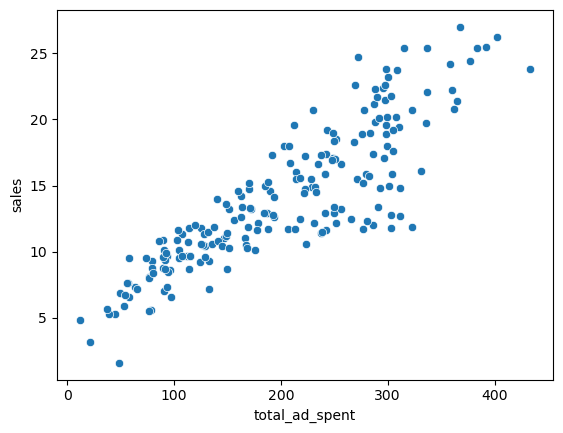

In [14]:
## Create a scatter plot to check for the relationship between total ad spent and sales. 

sns.scatterplot(data=df, x='total_ad_spent', y='sales')

** The scatterplot shows there is a positive correlation between both variables. The higher the amount spent on ads, the higher the sales. 

<AxesSubplot:xlabel='total_ad_spent', ylabel='sales'>

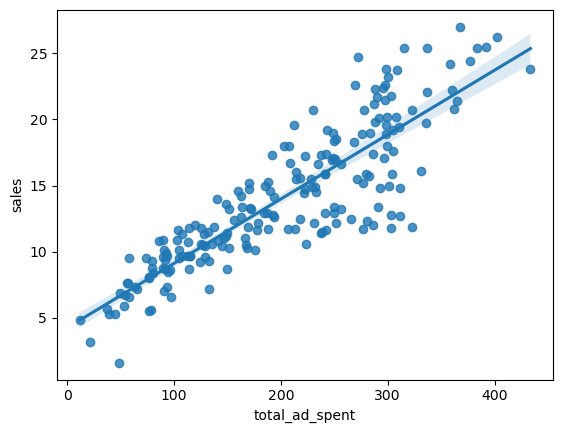

In [15]:
sns.regplot(data=df, x='total_ad_spent', y='sales')

In [16]:
X = df['total_ad_spent']
y= df['sales']

In [17]:
# y = mx + b
# y = B1X + B0
# help(np.polyfit)

In [18]:
#This give you the Betas

np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [19]:
potential_spent = np.linspace(0,500,100)

In [20]:
#       y       =        B1X                +      B0
predicted_sales = 0.0486878*potential_spent + 4.24302822

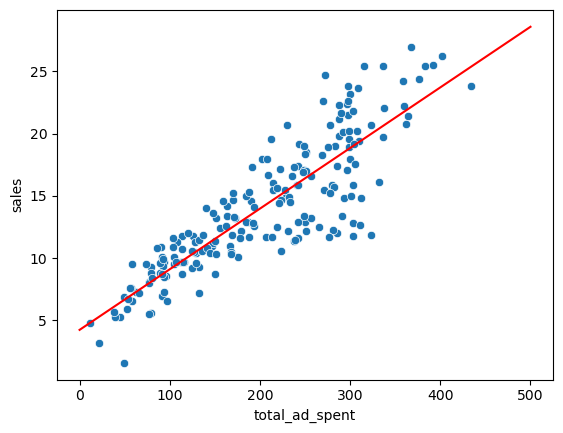

In [22]:
sns.scatterplot(data=df, x='total_ad_spent', y='sales')
plt.plot(potential_spent,predicted_sales,color='red')

In [23]:
spend= 200

predicted_sales = 0.0486878*spend + 4.24302822

predicted_sales

13.980588220000001

In [24]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [25]:
# Instead of y = B1X + B0

# y = B3x**3 + B2x**2 + B1x + B0

In [26]:
pot_spend = np.linspace(0,500,100)

In [27]:
# high level polynomial model

pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend +  2.70495053e+00

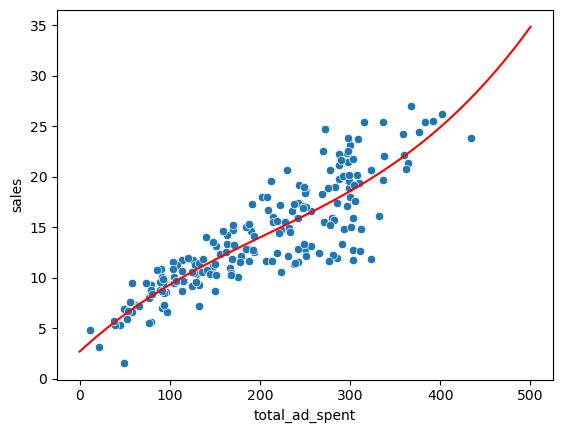

In [30]:
sns.scatterplot(data=df, x='total_ad_spent', y='sales')
plt.plot(pot_spend,pred_sales,color='red')

# Linear Regression with Scikit- Learn

In [31]:
#Loading in data

df = pd.read_csv('C:\\Users\\user\\Downloads\\DS&ML\\08-Linear-Regression-Models\\Advertising.csv')

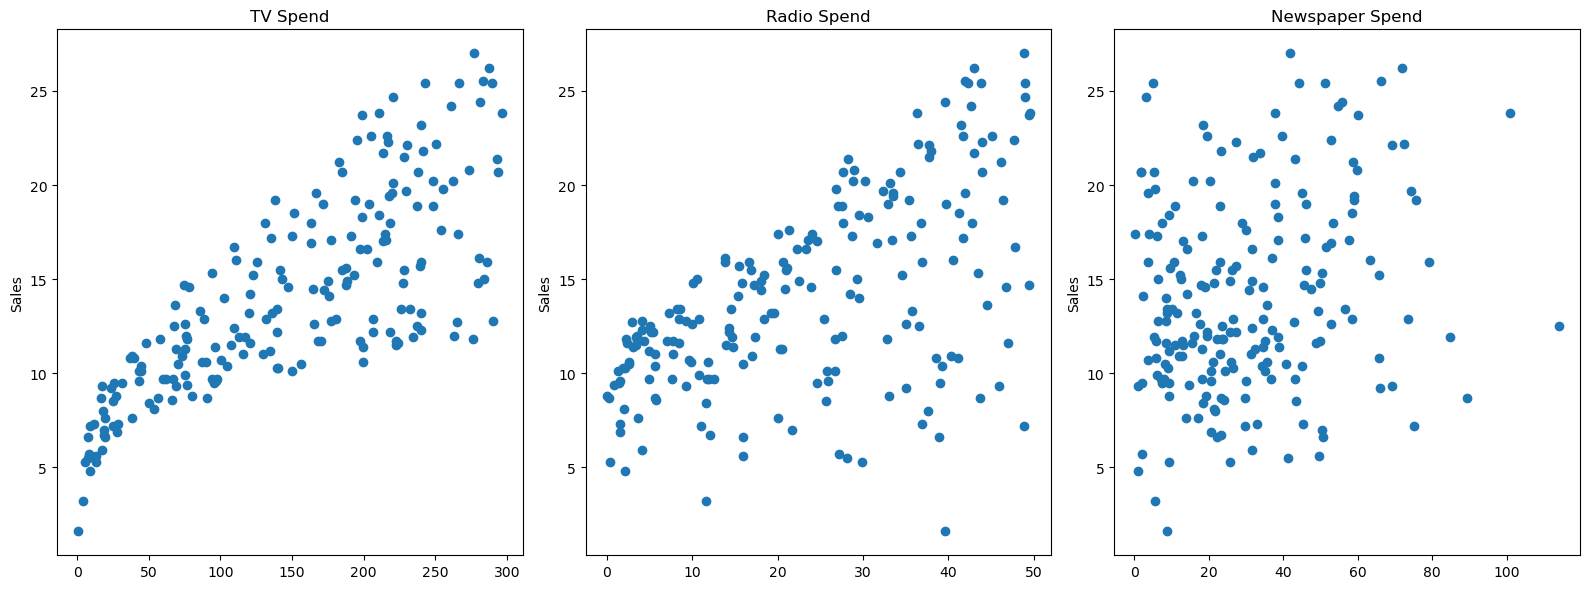

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [37]:
#Choosing features and labels

X= df.drop('sales',axis=1)

In [38]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [39]:
y= df['sales']

In [40]:
# Spliting into training and test set

from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [43]:
#Fit and train your model on the training set

from sklearn.linear_model import LinearRegression

In [44]:
#help(LinearRegression)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [49]:
test_predictions = model.predict(X_test) # compare the predictions of X_test to y_test

In [50]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

# Performance Evaluation

In [51]:
##### Mean Absolute Error 
##### Mean Squared Error 
#### Root Mean Square Error

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
df['sales'].mean()

14.022500000000003

In [54]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [55]:
mean_squared_error(y_test,test_predictions)

2.2987166978863782

In [56]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.516151937599388

# Evaluating Residuals

In [59]:
test_residuals = y_test - test_predictions

In [60]:
#test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

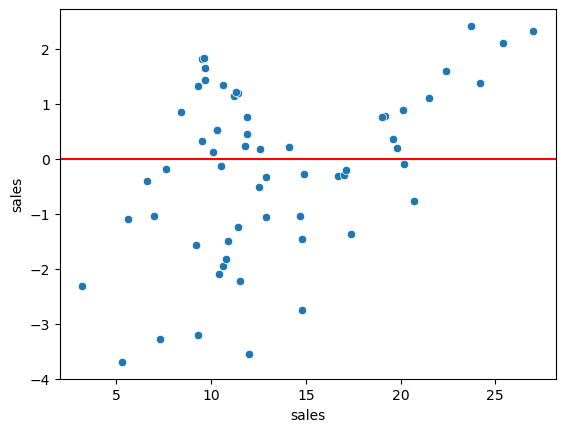

In [63]:
# The points are randomly spread so this shows that linear regression is a valid choice for the Model.

sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0,color='red')

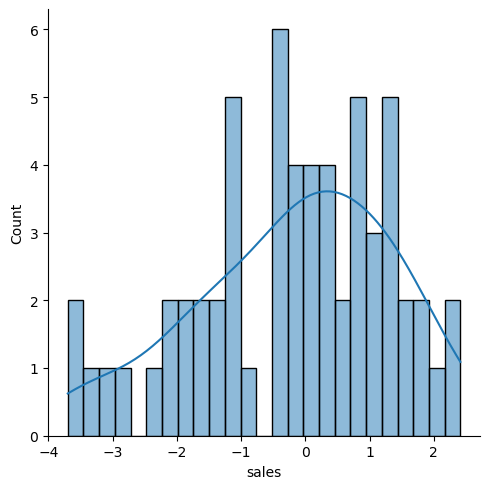

In [64]:
sns.displot(test_residuals,bins=25,kde=True)

# Model Deployment

In [66]:
#Saving and loading the model for future use

In [68]:
final_model = LinearRegression()

In [69]:
final_model.fit(X,y)

LinearRegression()

In [70]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [73]:
y_hat = final_model.predict(X)

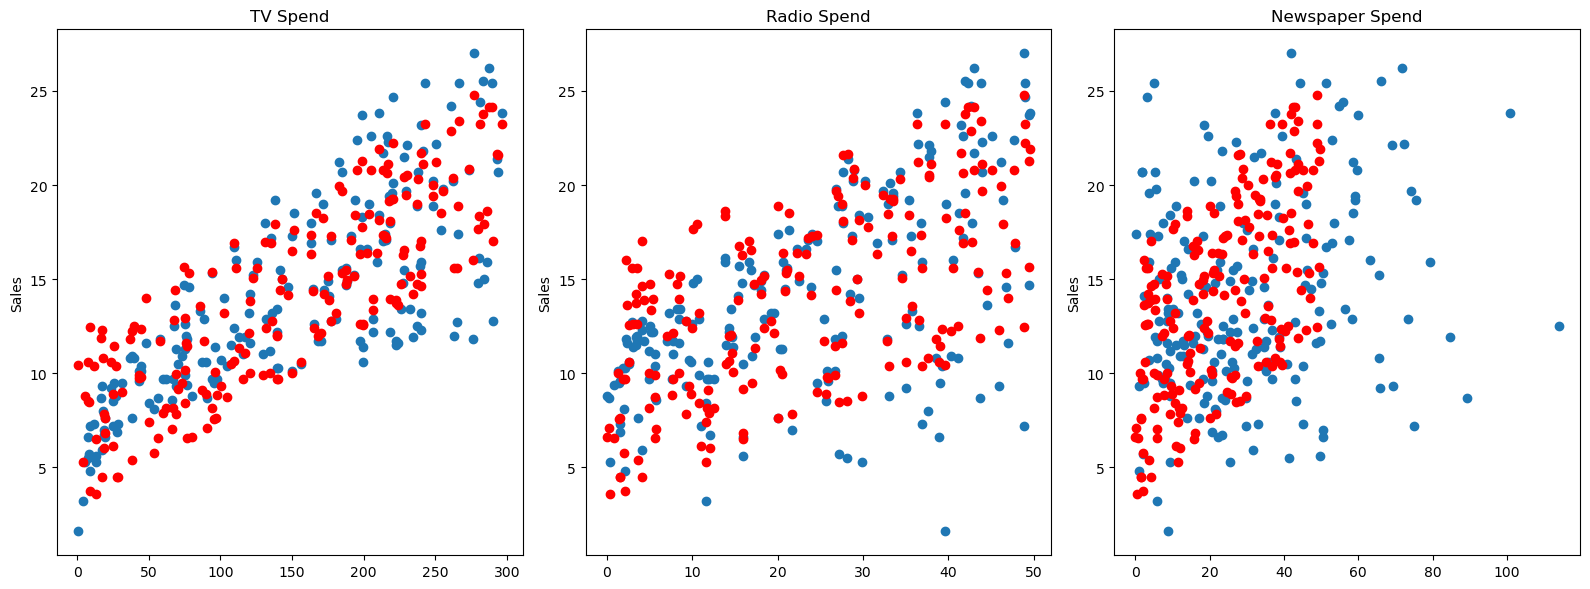

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [75]:
from joblib import dump,load

In [76]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [77]:
#from joblib import dump,load

loaded_model =  load('final_sales_model.joblib')

In [78]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

# Predict for new advertising campaign

In [79]:
# know the shape of the features you trained on. The shape is 2D so the ad campaign test example data will also be 2D [[]]

X.shape

(200, 3)

In [82]:
#149 TV, 22 Radio, 12 NP

campaign = [[149, 22, 12]]

In [85]:
loaded_model.predict(campaign)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])